# Pre-processing part 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

Data after first part of pre-process

In [4]:
df = pd.read_csv("./data/Titanic_3.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Age_1,Sex_cat,Embarked_cat,Age_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Missing,S,M,22.0,1,2,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,C,38.0,0,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,Missing,S,M,26.0,0,2,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,C,35.0,0,2,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,Missing,S,M,35.0,1,2,35.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Deck          891 non-null    object 
 13  Age_1         891 non-null    float64
 14  Sex_cat       891 non-null    int64  
 15  Embarked_cat  891 non-null    int64  
 16  Age_2         891 non-null    float64
dtypes: float64(4), int64(7), object(6)
memory usage: 118.5+ KB


### Inconsistent

In [6]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [7]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

There are duplicate values, some of them have only numbers and some contains also letter. There is any added information here?

#### Name
Name is a unique value but is there any added information in it?

In [8]:
len(df['Name'].unique())

891

In [9]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [10]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
pd.crosstab(df['Title'], df['Sex']).sort_values(by = ['female', 'male'], ascending=False)

Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Dr,1,6
Countess,1,0
Lady,1,0
Mme,1,0
Ms,1,0
Mr,0,517


Save only the common titles.

In [12]:
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df["Title"] = df['Title'].apply(lambda x: 'Rare' if x not in ['Miss', 'Mrs', 'Mr', 'Master'] else x)

In [13]:
pd.crosstab(df['Title'], df['Sex']).sort_values(by = ['female', 'male'], ascending=False)

Sex,female,male
Title,,
Miss,185,0
Mrs,126,0
Rare,3,20
Mr,0,517
Master,0,40


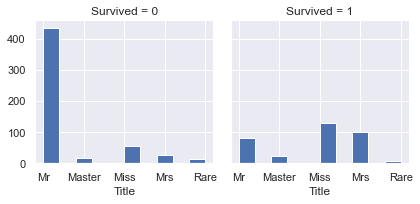

In [14]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Title')

In [15]:
df['Title_cat'] = df['Title'].astype('category').cat.codes

### New features
We can create a new feature for family size which combines Parch (parents/children's) and SibSp (siblings/spouses). This will enable us to drop Parch and SibSp from our datasets.

In [16]:
df['Family_Size'] = df['SibSp'] + df['Parch'] 
df['Family_Size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

We can create another feature called Is_Alone based on the family size. 

In [17]:
df['Is_Alone'] = 0
df.loc[df['Family_Size']==0, 'Is_Alone'] = 1
df.groupby(['Family_Size','Is_Alone']).size()

Family_Size  Is_Alone
0            1           537
1            0           161
2            0           102
3            0            29
4            0            15
5            0            22
6            0            12
7            0             6
10           0             7
dtype: int64

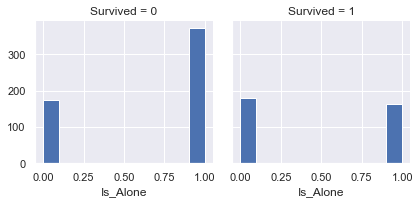

In [18]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Is_Alone')

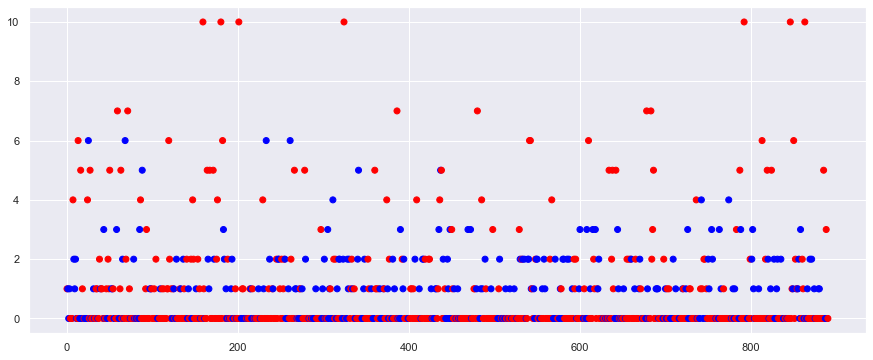

In [19]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['Family_Size'], c = df['Survived'].map(colordict))

### Discretization
- Equal-width partitioning
- Equal-depth partitioning
- Another reasoning partitioning 

#### Equal-width
$W = \frac{(B –A)}{N}$

In [20]:
A = df['Age_2'].min()
B = df['Age_2'].max()
N = 5
W = np.round((B - A)/N)
W

16.0

In [21]:
df.loc[ df['Age_2'] <= W, 'Age_bin'] = 0
df.loc[(df['Age_2'] > W) & (df['Age_2'] <= 2*W), 'Age_bin'] = 1
df.loc[(df['Age_2'] > 2*W) & (df['Age_2'] <= 3*W), 'Age_bin'] = 2
df.loc[(df['Age_2'] > 3*W) & (df['Age_2'] <= 4*W), 'Age_bin'] = 3
df.loc[ df['Age_2'] > 4*W, 'Age_bin'] = 4

In [22]:
df['Age_bin'].value_counts()

1.0    419
2.0    256
0.0    132
3.0     72
4.0     12
Name: Age_bin, dtype: int64

What do you think about that partition?

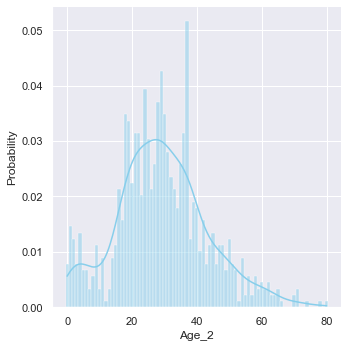

In [23]:
sns.displot(df['Age_2'], kde=True, color='skyblue', stat="probability", discrete=True )

#### Reasoning partition
By age groups

In [24]:
df.loc[ df['Age_2'] <= 12, 'Age_bin2'] = 0
df.loc[(df['Age_2'] > 12) & (df['Age_2'] <= 20), 'Age_bin2'] = 1
df.loc[(df['Age_2'] > 20) & (df['Age_2'] <= 30), 'Age_bin2'] = 2
df.loc[(df['Age_2'] > 30) & (df['Age_2'] <= 45), 'Age_bin2'] = 3
df.loc[ df['Age_2'] > 45, 'Age_bin2'] = 4

In [25]:
df['Age_bin2'].value_counts()

2.0    281
3.0    276
1.0    132
4.0    110
0.0     92
Name: Age_bin2, dtype: int64

### Normalization
- Min-max 
- Z-score
- Decimal scalie 

It is important to notice that new data (e.g. test data) is normalized by the same scale.

#### Min-Max normalization

Change the data to be with values between 0 to 1.

In [26]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['Fare']))
df['Fare_min_max'] = scaler.transform(pd.DataFrame(df['Fare']))
print(scaler.data_min_)
print(scaler.data_max_)
df[['Fare','Fare_min_max']].head()

[0.]
[512.33]


,Fare,Fare_min_max
0,7.25,0.014151
1,71.28,0.139129
2,7.93,0.015478
3,53.10,0.103644
4,8.05,0.015713


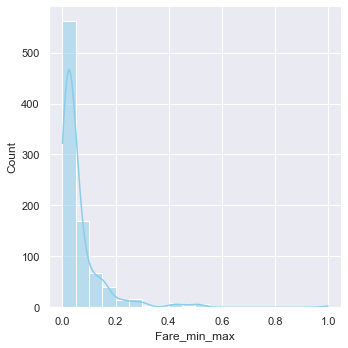

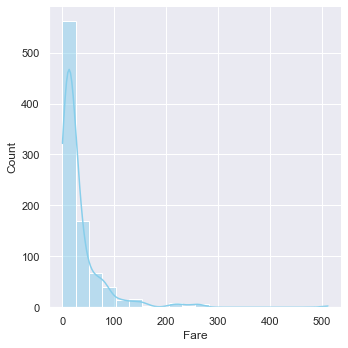

In [27]:
sns.displot(df['Fare_min_max'], bins=20, kde=True, color='skyblue')
sns.displot(df['Fare'], bins=20, kde=True, color='skyblue')

#### Z-score normalization

Change the data to be with 0 mean and variance 1.

0   -0.517838
1    0.615799
2   -0.234429
3    0.403242
4    0.403242
Name: Age_norm, dtype: float64


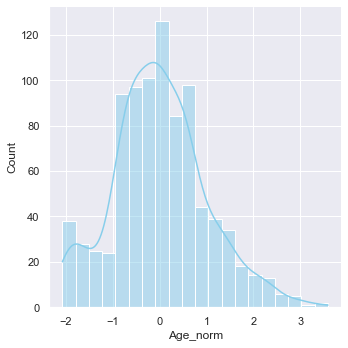

In [28]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['Age_2']))
df['Age_norm'] = z_scaler.transform(pd.DataFrame(df['Age_2']))
print(df['Age_norm'].head())
sns.displot(df['Age_norm'], bins=20, kde=True, color='skyblue')

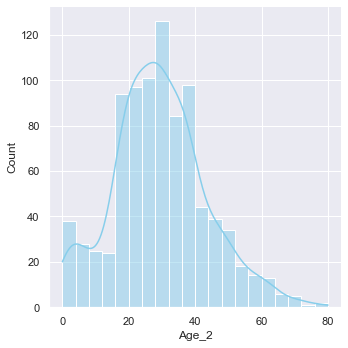

In [29]:
sns.displot(df['Age_2'], bins=20, kde=True, color='skyblue')

### Outlier

Search for abnormal values i.e. those that are at the edges of the distribution, by checking an abnormality of 3 standard deviations.

In [30]:
data = df['Age_2']
data_mean, data_std = np.mean(data), np.std(data)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
df.loc[(df['Age_2'] > upper) | (df['Age_2'] < lower)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_cat,Age_2,Title,Title_cat,Family_Size,Is_Alone,Age_bin,Age_bin2,Fare_min_max,Age_norm
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.10,...,2,77.503765,Mrs,3,1,0,4.0,4.0,0.031425,3.414732
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.00,...,2,80.000000,Mr,2,0,1,4.0,4.0,0.058556,3.591596
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.78,...,2,74.000000,Mr,2,0,1,4.0,4.0,0.015186,3.166482


### Data reduction

#### PCA

Use only numerical columns and without missing value.

In [31]:
df1 = df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex_cat', 'Embarked_cat', 'Title_cat', 
       'Is_Alone', 'Fare_min_max', 'Age_norm']]
df1.head()

,Survived,Pclass,SibSp,Parch,Sex_cat,Embarked_cat,Title_cat,Is_Alone,Fare_min_max,Age_norm
0,0,3,1,0,1,2,2,0,0.014151,-0.517838
1,1,1,1,0,0,0,3,0,0.139129,0.615799
2,1,3,0,0,0,2,1,1,0.015478,-0.234429
3,1,1,1,0,0,2,3,0,0.103644,0.403242
4,0,3,0,0,1,2,2,1,0.015713,0.403242


In [32]:
df1.shape

(891, 10)

Apply PCA - fit and transform

In [39]:
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='Survived')
df2 = pd.DataFrame(pca.transform(df1))

In [40]:
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.691549,-0.414471,-0.761225,0.339039,-0.062709,-0.421151,-0.115174,0.306487,-0.590887,0.008439
1,-0.658305,1.730598,1.432012,0.856845,0.119811,-0.878713,0.416930,-0.032244,-0.194788,-0.029910
2,0.051710,-1.090455,0.033651,-0.486891,-0.339853,0.445494,1.079008,-0.033914,0.137228,0.005802
3,-0.443461,1.492754,0.126228,-0.451828,-0.469486,-1.284656,0.514047,-0.005376,-0.256420,-0.029597
4,-0.643055,-0.619689,-0.902756,0.153218,0.048678,0.276456,-0.025858,0.020210,0.026647,0.022791


In [35]:
pca.explained_variance_ratio_

array([0.32700483, 0.20461888, 0.13713136, 0.09319404, 0.0875358 ,
       0.06825459, 0.04757108, 0.01712199, 0.01654593, 0.00102149])

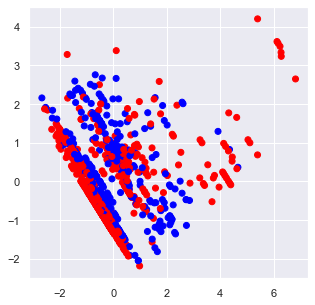

In [36]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[1], c = df['Survived'].map(colordict))

### Save the data after pre-process

In [37]:
df1.head()

,Survived,Pclass,SibSp,Parch,Sex_cat,Embarked_cat,Title_cat,Is_Alone,Fare_min_max,Age_norm
0,0,3,1,0,1,2,2,0,0.014151,-0.517838
1,1,1,1,0,0,0,3,0,0.139129,0.615799
2,1,3,0,0,0,2,1,1,0.015478,-0.234429
3,1,1,1,0,0,2,3,0,0.103644,0.403242
4,0,3,0,0,1,2,2,1,0.015713,0.403242


In [38]:
df1.to_csv('Titanic_final.csv')